<a href="https://colab.research.google.com/github/asosialuk/Fire_detection_project/blob/main/plant_detecion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install opendatasets
!pip install opendatasets

In [2]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import seaborn as sns

In [3]:
#kaggle dataset download
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alicjasosialuk
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:22<00:00, 126MB/s]


In [ ]:
#just for info{"username":"alicjasosialuk","key":"fa69bfa4724b0a10006ba687db303759"}

In [4]:
#path to datasets
data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
data_dir_val = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
data_dir_test = './new-plant-diseases-dataset/test/test'

In [5]:
#listing the folders
os.listdir(data_dir_train)

['Potato___Early_blight',
 'Apple___healthy',
 'Corn_(maize)___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Blueberry___healthy',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Strawberry___Leaf_scorch',
 'Raspberry___healthy',
 'Squash___Powdery_mildew',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Target_Spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Pepper,_bell___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Tomato_mosaic_virus',
 'Cherry_(including_sour)___healthy',
 'Tomato___Septoria_leaf_spot',
 'Strawberry___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Potato___healthy',
 'Potato___Late_blight',
 'Grape___Black_rot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Peach___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Soybean___healthy',
 'Tomato___

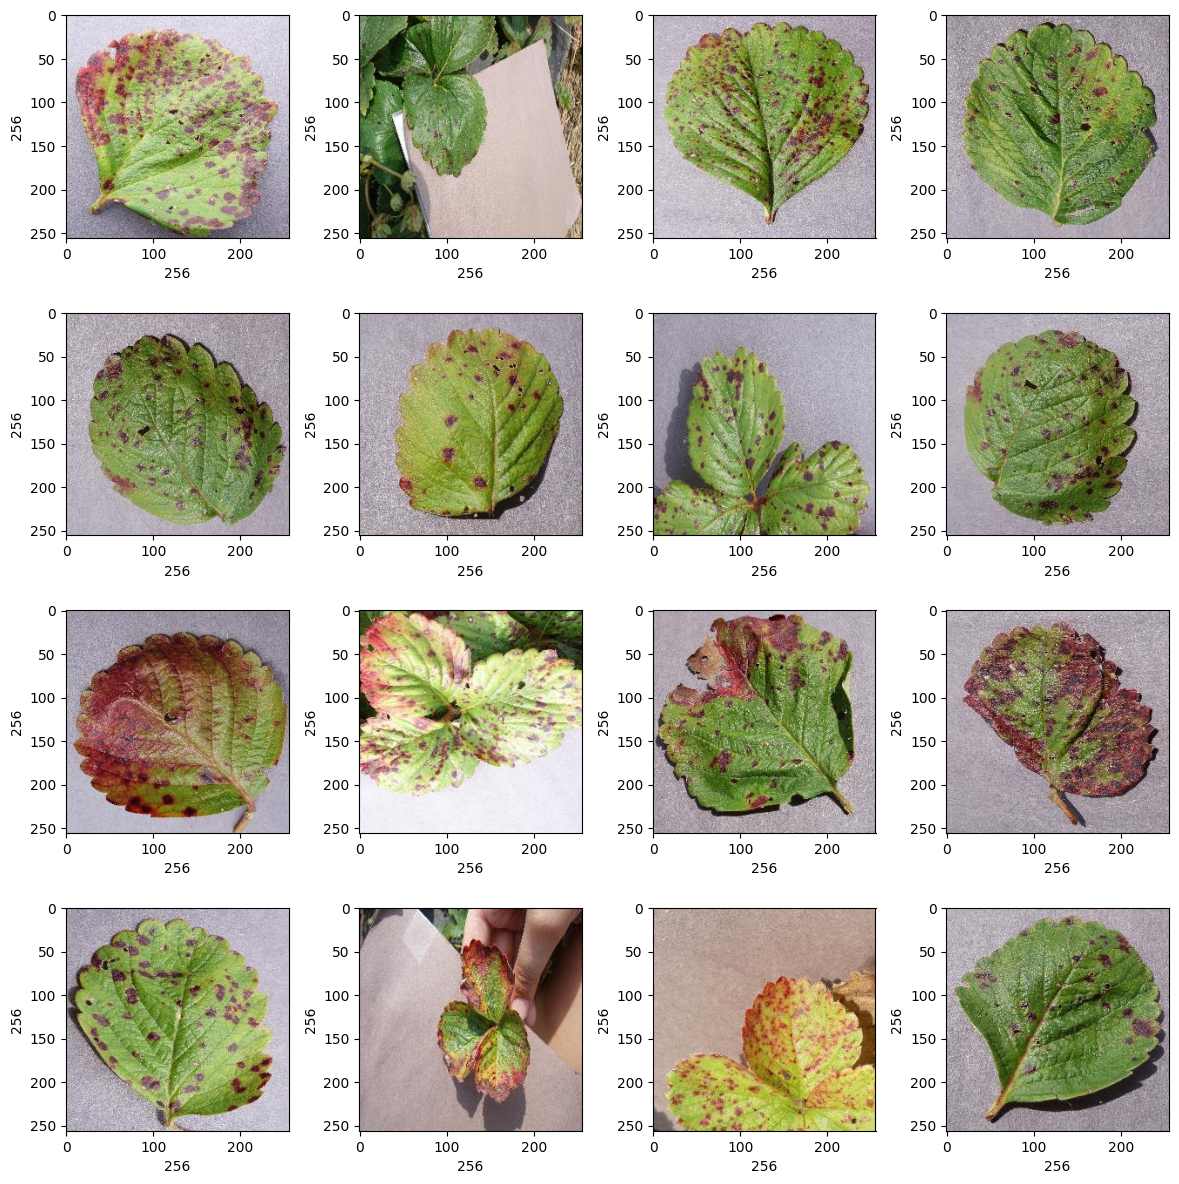

In [ ]:
# showing some random photos for the quality check - Strawberry Leaf scorch
plt.figure(figsize=(12,12))
#path = data_dir
for i in range(1,17):
    data_dir = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch'
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(data_dir +'/'+ random.choice(sorted(os.listdir(data_dir))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [6]:
#creation of the data frame with the info for data analyses
import pandas as pd
data = []

for directory in os.listdir(data_dir_train):
    columns = directory.split('___')
    columns.append(directory)

    sub_path = data_dir_train + '/' + directory
    columns.append(len([name for name in os.listdir(path=sub_path)]))

    data.append(columns)

data = pd.DataFrame(data, columns=['Plant', 'Disease', 'Directory', 'Files'])
data.sort_values(by='Plant')

Plant                               Disease  \
1                     Apple                               healthy   
19                    Apple                      Cedar_apple_rust   
5                     Apple                            Apple_scab   
6                     Apple                             Black_rot   
4                 Blueberry                               healthy   
21  Cherry_(including_sour)                               healthy   
17  Cherry_(including_sour)                        Powdery_mildew   
14             Corn_(maize)                  Northern_Leaf_Blight   
18             Corn_(maize)   Cercospora_leaf_spot Gray_leaf_spot   
35             Corn_(maize)                          Common_rust_   
2              Corn_(maize)                               healthy   
12                    Grape                  Esca_(Black_Measles)   
27                    Grape                             Black_rot   
31                    Grape    Leaf_blight_(Isariopsis_Leaf_Spot)   
10                    Grape                               healthy   
3                    Orange       Haunglongbing_(Citrus_greening)   
30                    Peach                               healthy   
11                    Peach                        Bacterial_spot   
24             Pepper,_bell                        Bacterial_spot   
15             Pepper,_bell                               healthy   
26                   Potato                           Late_blight   
25                   Potato                               healthy   
0                    Potato                          Early_blight   
8                 Raspberry                               healthy   
32                  Soybean                               healthy   
9                    Squash                        Powdery_mildew   
23               Strawberry                               healthy   
7                Strawberry                           Leaf_scorch   
20                   Tomato                   Tomato_mosaic_virus   
36                   Tomato         Tomato_Yellow_Leaf_Curl_Virus   
16                   Tomato  Spider_mites Two-spotted_spider_mite   
13                   Tomato                           Target_Spot   
28                   Tomato                          Early_blight   
29                   Tomato                           Late_blight   
33                   Tomato                             Leaf_Mold   
34                   Tomato                               healthy   
22                   Tomato                    Septoria_leaf_spot   
37                   Tomato                        Bacterial_spot   

                                            Directory  Files  
1                                     Apple___healthy   2008  
19                           Apple___Cedar_apple_rust   1760  
5                                  Apple___Apple_scab   2016  
6                                   Apple___Black_rot   1987  
4                                 Blueberry___healthy   1816  
21                  Cherry_(including_sour)___healthy   1826  
17           Cherry_(including_sour)___Powdery_mildew   1683  
14                Corn_(maize)___Northern_Leaf_Blight   1908  
18  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   1642  
35                        Corn_(maize)___Common_rust_   1907  
2                              Corn_(maize)___healthy   1859  
12                       Grape___Esca_(Black_Measles)   1920  
27                                  Grape___Black_rot   1888  
31         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)   1722  
10                                    Grape___healthy   1692  
3            Orange___Haunglongbing_(Citrus_greening)   2010  
30                                    Peach___healthy   1728  
11                             Peach___Bacterial_spot   1838  
24                      Pepper,_bell___Bacterial_spot   1913  
15                             Pepper,_bell___healthy   1988  
26     

In [7]:
#Total of pictures
data['Files'].sum()

70295

In [ ]:
data['Disease']

ValueError: num must be an integer with 1 <= num <= 16, not 17

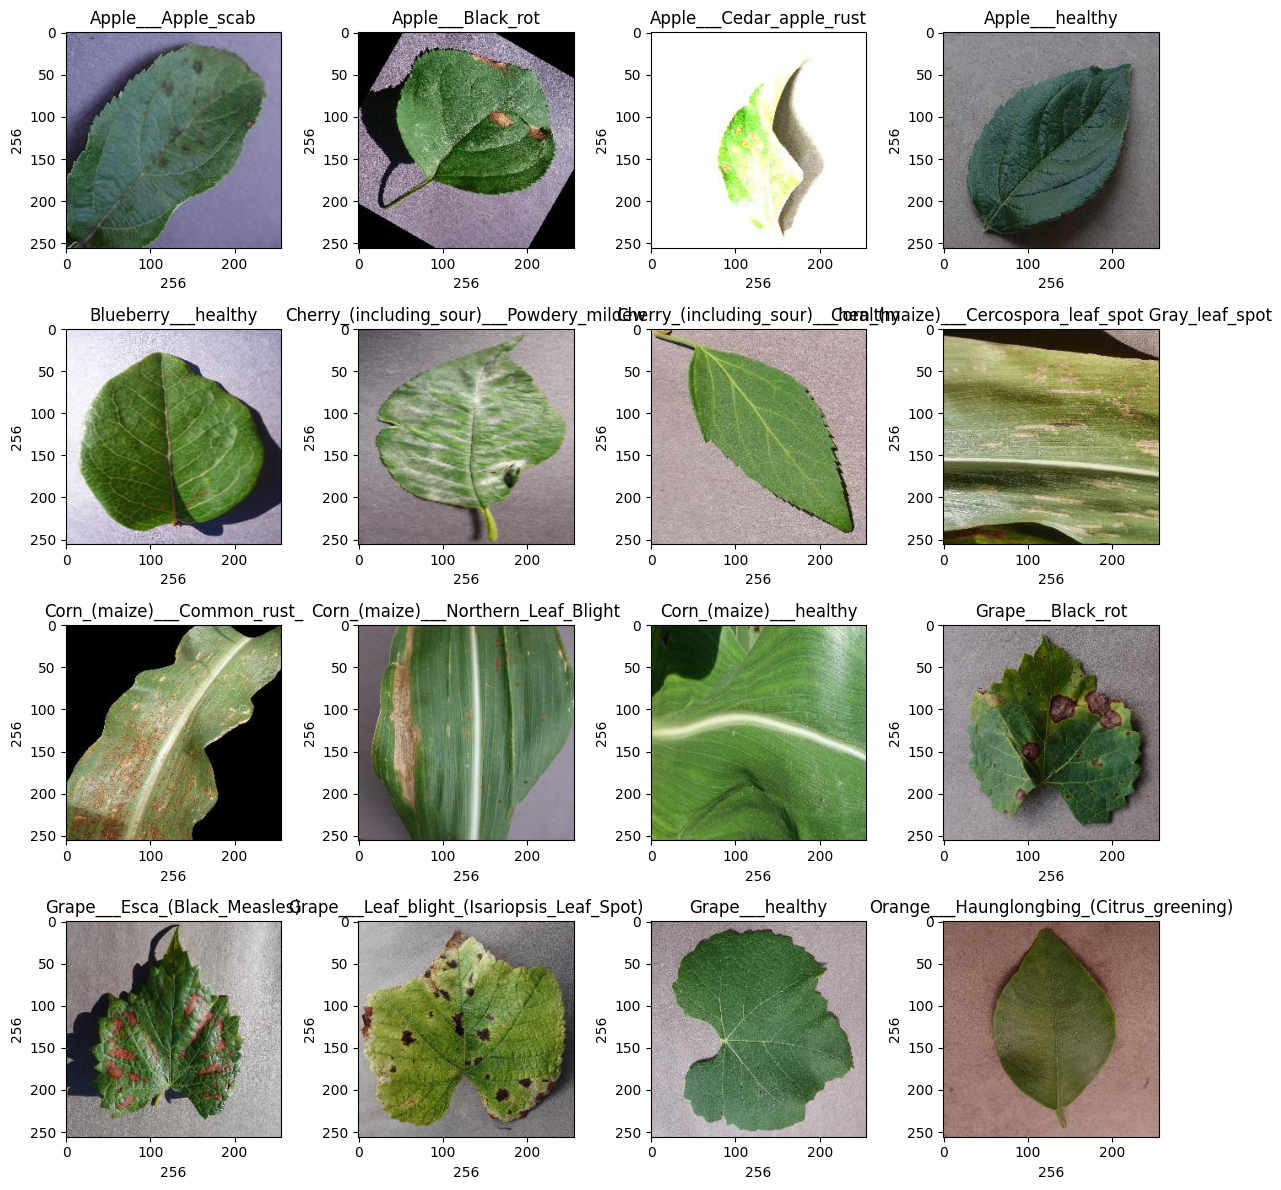

In [ ]:
#showing random pictures from the folder _train
plt.figure(figsize=(12,12))

#data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

folders = sorted(os.listdir(data_dir_train))

for i, folder in enumerate(folders):
    plt.subplot(4, 4,i+1)
    plt.tight_layout()
    image_file = os.path.join(data_dir_train, folder, os.listdir(os.path.join(data_dir_train, folder))[0])
    image = imread(image_file)
    plt.imshow(image)
    plt.xlabel(image.shape[1], fontsize=10)  # width of image
    plt.ylabel(image.shape[0], fontsize=10)  # height of image
    plt.title(folder)

plt.show()

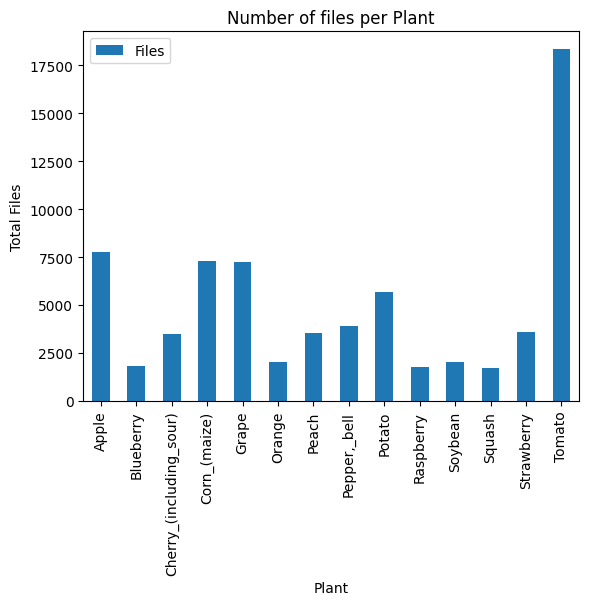

In [ ]:
data.groupby('Plant')['Files'].sum().plot(kind='bar')
plt.legend()
plt.xlabel('Plant')
plt.ylabel('Total Files')
plt.title('Number of files per Plant')
plt.show()


<ipython-input-46-8793a2ec4f9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Plant', 'Disease']).sum().reset_index()


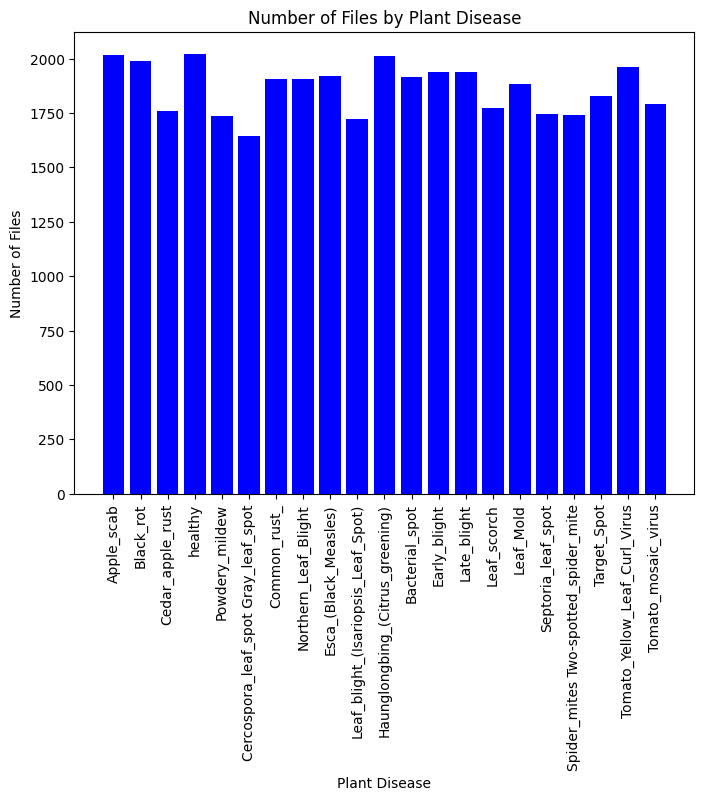

In [ ]:
grouped_data = data.groupby(['Plant', 'Disease']).sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['Disease'], grouped_data['Files'], color='blue')
plt.title('Number of Files by Plant Disease')
plt.xlabel('Plant Disease')
plt.ylabel('Number of Files')
plt.xticks(rotation=90)
plt.show()

In [8]:
import plotly.express as px

In [9]:
fig_a= px.bar(data, x="Plant", y="Files", color="Disease")
fig_a.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.00,
    xanchor="right",
    x=1
))

In [10]:
px.bar(data, x="Disease", y="Files", color="Plant")

In [11]:
folders=sorted(os.listdir(data_dir_train))

In [12]:
resolutions=[]
color_distributions=[]
sizes=[]

In [13]:
#Iterate over each image file in each folder
for dirpath, dirnames, filenames in os.walk(data_dir_train):
  for filename in filenames:
     if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
      #Load image file with OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)
            #Extract resolution / color distribution & size
            resolution=img.shape[:2]
            resolutions.append(resolution)
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)
            size=os.path.getsize(img_path)
            sizes.append(size)



In [14]:
 #Convert the lists to np arrays for manipulation
 sizes=np.array(sizes)
 resolutions=np.array(resolutions)
 color_distributions=np.array(color_distributions)

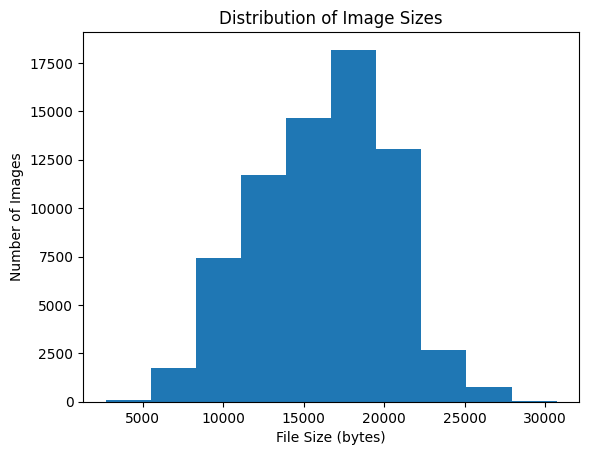

In [15]:
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

In [16]:

fig = px.histogram(x=sizes, nbins=25, title="Distribution of Image Sizes")
fig.update_layout(
    xaxis_title="File Size",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()


In [17]:

#Print the resolution (width and height) within our dataset to have insights into the overall image dimensions.
print(resolutions)

[[256 256]
 [256 256]
 [256 256]
 ...
 [256 256]
 [256 256]
 [256 256]]


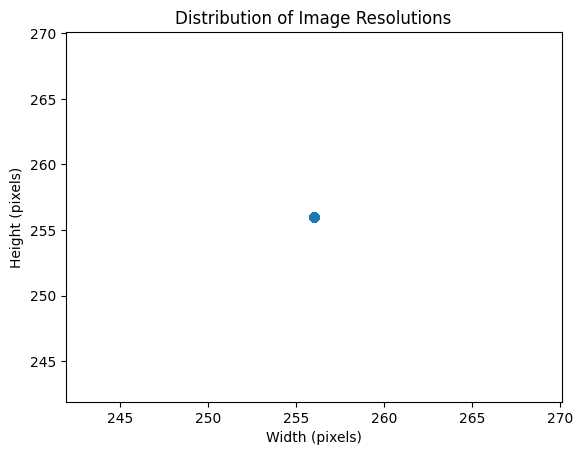

In [18]:
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [19]:

df = pd.DataFrame(resolutions, columns=['width', 'height'])

In [20]:

fig = px.scatter_3d(df, x='width', y='height', z=df.index,
                    title='Distribution of Image Resolutions',
                    labels={'width': 'Width (pixels)',
                            'height': 'Height (pixels)',
                            'index': 'Image Index'},
                    color=df.index)

In [21]:
fig.update_traces(marker=dict(size=2, line=dict(width=0.5)))

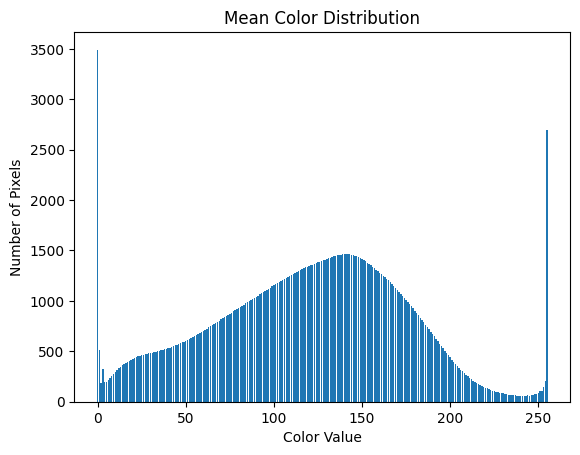

In [22]:
#Calculate the mean color distribution to understand the dominant colors in the dataset
mean_color_distribution = np.mean(color_distributions, axis=0)

plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

In [23]:

import plotly.graph_objects as go

mean_color_distribution = np.mean(color_distributions, axis=0)
fig = go.Figure(
    go.Bar(x=np.arange(256), y=mean_color_distribution, name="Mean Color Distribution")
)
fig.update_layout(
    title="Mean Color Distribution",
    xaxis_title="Color Value",
    yaxis_title="Number of Pixels")

In [24]:
#Color distribution for each image for patterns and variation analysis, color composition

# bar traces for each color value
traces = []
for i in range(256):
    traces.append(go.Bar(x=np.arange(len(color_distributions)), y=color_distributions[:, i], name=str(i)))

# Create the figure and set the layout
fig = go.Figure(data=traces)
fig.update_layout(title="Color Distributions for Each Image", xaxis_title="Image Index", yaxis_title="Number of Pixels", barmode="stack")
# Show the plot
fig.show()

In [ ]:

data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
all_labels = {'Apple___Apple_scab':0, 'Apple___Black_rot':1, 'Apple___Cedar_apple_rust':2, 'Apple___healthy':3, 'Blueberry___healthy':4, 'Cherry_(including_sour)___Powdery_mildew':5, 'Cherry_(including_sour)___healthy':6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot':7, 'Corn_(maize)___Common_rust_':8, 'Corn_(maize)___Northern_Leaf_Blight':9, 'Corn_(maize)___healthy':10, 'Grape___Black_rot':11, 'Grape___Esca_(Black_Measles)':12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)':13, 'Grape___healthy':14, 'Orange___Haunglongbing_(Citrus_greening)':15, 'Peach___Bacterial_spot':16, 'Peach___healthy':17, 'Pepper,_bell___Bacterial_spot':18, 'Pepper,_bell___healthy':19, 'Potato___Early_blight':20, 'Potato___Late_blight':21, 'Potato___healthy':22, 'Raspberry___healthy':23, 'Soybean___healthy':24, 'Squash___Powdery_mildew':25, 'Strawberry___Leaf_scorch':26, 'Strawberry___healthy':27, 'Tomato___Bacterial_spot':28, 'Tomato___Early_blight':29, 'Tomato___Late_blight':30, 'Tomato___Leaf_Mold':31, 'Tomato___Septoria_leaf_spot':32, 'Tomato___Spider_mites Two-spotted_spider_mite':33, 'Tomato___Target_Spot':34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus':35, 'Tomato___Tomato_mosaic_virus':36, 'Tomato___healthy':37}

# Create empty lists to store images and labels
images = []
labels = []

# Loop through all folders in the data directory
for folder in os.listdir(data_dir_train):
    # Loop through all images in the folder
    for file in os.listdir(os.path.join(data_dir_train, folder)):
        # Load the image
        img = cv2.imread(os.path.join(data_dir_train, folder, file))
        # Resize the image to 256x256
        img = cv2.resize(img, (256, 256))
        # Convert the image to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Convert the image to an array
        img = np.array(img)
        # Append the image to the list of images
        images.append(img)
        # Append the label to the list of labels
        labels.append(all_labels[folder])

# Convert the lists of images and labels to arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the arrays
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)


Images shape: (70295, 256, 256)
Labels shape: (70295,)
